<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Задание
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

    без подписки
      
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 88 рублей;
        стоимость старта (начала поездки) — 5050 рублей;
    с подпиской Ultra
      
        абонентская плата — 199199 рублей в месяц;
        стоимость одной минуты поездки — 66 рублей;
        стоимость старта — бесплатно.

# План работы
* Шаг 1. Загрузка данных
* Шаг 2. Предобработка данных
* Шаг 3. Исследовательский анализ данных
* Шаг 4. Объединение данных

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Супер, что начинаешь с введения! Но давай добавим еще описание данных и тогда будет идеально!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Молодец, что импортируешь библиотеки в отдельной ячейке

#### Шаг 1. Загрузка данных

In [3]:
df_users = pd.read_csv('/datasets/users_go.csv')
df_rides = pd.read_csv('/datasets/rides_go.csv')
df_subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [7]:
for df in (df_users, df_rides, df_subs):
    print("head:{")
    display(df.head())
    print("}")
    print("info:{")
    display(df.info())
    print("}")
    print("//////////////////////////////////////////////////")

head:{


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


}
info:{
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

}
//////////////////////////////////////////////////
head:{


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


}
info:{
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

}
//////////////////////////////////////////////////
head:{


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


}
info:{
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

}
//////////////////////////////////////////////////


# Вывод

Имеем три датафрейма с выборками даных вероятно из таблиц БД. В первой табице имеем столбцы, относящиеся к пользователю, с id, именем, городом, возрастом, наличием подписки.
Во втором дата-фрейме видим информацию о поездках тех или иных пользователей с колонками id пользователя, дистанции, продолжительности и даты.
В третьем дата-фрейме имеем теблицу с данными ценообразования для плоьзователй с подпиской и без.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> print() работал для списков и словарей, для датафрейм следует использовать display()
        
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Сделаем вывод по обзору данных? 
    
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Респект!

#### Шаг 2. Предобработка данных

In [8]:
df_rides.date = pd.to_datetime(df_rides.date, format='%Y-%m-%d')
df_rides['month'] = df_rides.date.dt.month
df_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [22]:
print(df_rides.date.dt.year.unique())
print(df_rides.date.sort_values().dt.month.unique())

[2021]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно, дата должна быть датой) 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Столбец добавили, только давай проверим данные за сколько лет мы имеем? Это важно понимать, чтоб данные не склеились при агрегации
        <div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Хороешчно!

In [5]:
for df in (df_users, df_rides, df_subs):
    print("ДУБЛИКАТЫ:{")
    print(df.duplicated().sum())
    print("}")
    print("ПРОПУСКИ:{")
    print(df.isnull().sum())
    print("}\n")


ДУБЛИКАТЫ:{
31
}
ПРОПУСКИ:{
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
}

ДУБЛИКАТЫ:{
0
}
ПРОПУСКИ:{
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
}

ДУБЛИКАТЫ:{
0
}
ПРОПУСКИ:{
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
}



In [6]:
# удалим дубликаты
df_users = df_users.drop_duplicates()
print('Количество явных дубликатов в датасете:', df_users.duplicated().sum())

Количество явных дубликатов в датасете: 0


# Вывод
Удалили дубликаты. Перевели столбец с датой из строкового представления в тип даты. Представлены данные за 12 месяцев 2021 года.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А вывод?)
            <div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо, согласен)

#### Шаг 3. Исследовательский анализ данных

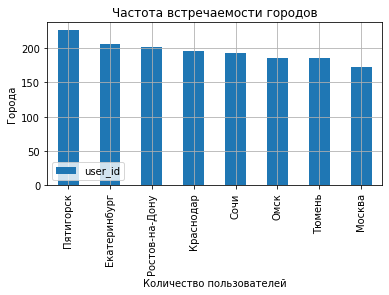

                user_id
city                   
Пятигорск           226
Екатеринбург        206
Ростов-на-Дону      202
Краснодар           196
Сочи                192
Омск                186
Тюмень              185
Москва              172


In [28]:
df_users_city = df_users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')
df_users_city = df_users_city.sort_values(by='user_id', ascending = False)
df_users_city.plot( kind='bar', figsize = (6,3), grid = True )
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.legend(loc='lower left')
plt.show()
print(df_users_city.sort_values(by='user_id', ascending = False))

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Верно. Молодец! Только обычно данные сортируют от большего к меньшему) 
                <div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Лайк

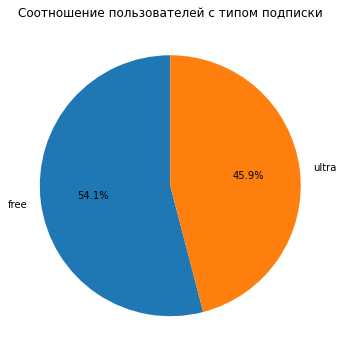

  subscription_type  user_id  Percentage
0              free      846   54.057508
1             ultra      719   45.942492


In [33]:
df_users_subs = df_users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').reset_index()
df_users_subs['Percentage'] = df_users_subs['user_id'] / df_users_subs['user_id'].sum() * 100
plt.figure(figsize=(6, 6))
plt.pie(df_users_subs['user_id'], labels=df_users_subs['subscription_type'], autopct='%1.1f%%', startangle=90)
plt.title('Соотношение пользователей с типом подписки')
plt.show()

print(df_users_subs)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Посчитаем долю пользователей с подпиской и без? И я бы советовал отразить информацию на круговой диаграмме. 
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Теперь идеально!

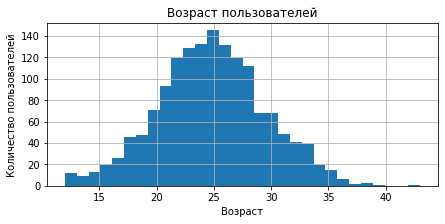

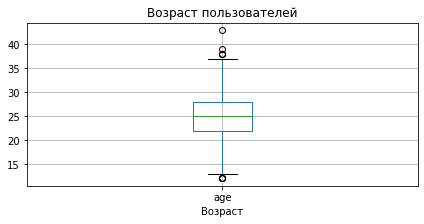

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [9]:
df_users['age'].plot(kind='hist', grid=True, figsize=(7, 3), bins=30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

df_users['age'].plot(kind='box', grid=True, figsize=(7, 3))
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('')
plt.show()

df_users['age'].describe()

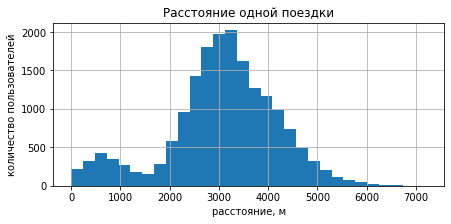

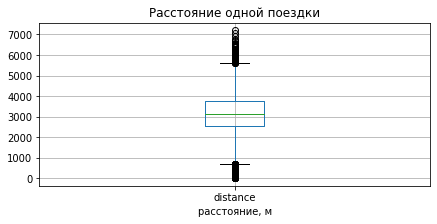

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [10]:
df_rides['distance'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Расстояние одной поездки')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.show()

df_rides['distance'].plot(kind='box', grid=True, figsize=(7, 3))
plt.title('Расстояние одной поездки')
plt.xlabel('расстояние, м')
plt.ylabel('')
plt.show()

df_rides['distance'].describe()

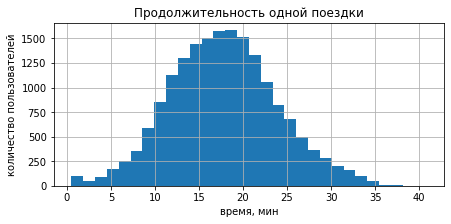

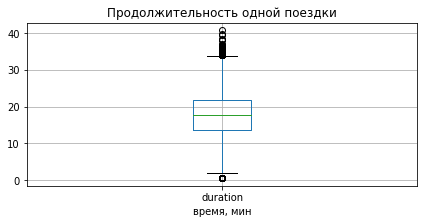

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [34]:
df_rides['duration'].plot(kind = 'hist', grid=True, figsize = (7,3), bins = 30)
plt.title('Продолжительность одной поездки')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.show()

df_rides['duration'].plot(kind='box', grid=True, figsize=(7, 3))
plt.title('Продолжительность одной поездки')
plt.xlabel('время, мин')
plt.ylabel('')
plt.show()

df_rides['duration'].describe()

# Вывод
Был проведен исследовательский анализ. Мы выяснили, что Пятигорск - самый популярный город среди пользователей, в то время как Москва показала меньшее количество пользователей. Средний возраст наших клиентов составляет примерно 24.9 лет, что помогает лучше определить целевую аудиторию.
Анализ расстояния и продолжительности поездок показал, что большинство поездок превышают 3 километра, но также есть короткие поездки на расстояния около 600 метров, что скорее всего свидетельствует о том, что сервис используется для перемещения к остановкам общественного транспорта. Средняя продолжительность поездки 17,8 минут.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Графики рассмотрены верно!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Не хвататет промежуточных выводов по каждому пункту)
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Отлично, молодец!

#### Шаг 4. Объединение данных

In [35]:
df_merged = df_rides.copy()
df_merged = df_merged.merge(df_users, how = 'left', on = 'user_id' )
df_merged = df_merged.merge(df_subs, how = 'left', on='subscription_type')
display(df_merged.head())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Объединение выполнено верно! Но не забывай, что в датафреймах используем display()
        
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

In [36]:
df_without_S = df_merged[df_merged['subscription_type'] == 'free']
display(df_without_S.head())
display(df_without_S.count().sum())

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6672,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6673,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6674,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6675,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6676,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


140592

In [37]:
df_with_S = df_merged[df_merged['subscription_type'] == 'ultra']
display(df_with_S.head())
display(df_with_S.count()[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


6672

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Датафреймы созданы

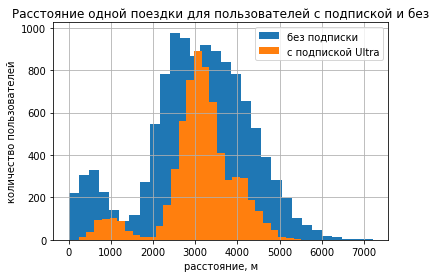

In [15]:
df_without_S['distance'].plot(kind = 'hist', grid=True, bins = 30, label='без подписки')
df_with_S['distance'].plot(kind = 'hist', grid=True, bins = 30, label='с подпиской Ultra')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

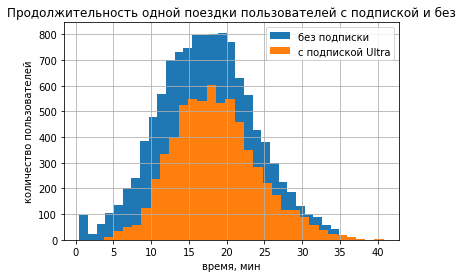

In [16]:
df_without_S['duration'].plot(kind = 'hist', grid=True, bins = 30, label='без подписки')
df_with_S['duration'].plot(kind = 'hist', grid=True, bins = 30, label='с подпиской Ultra')
plt.title('Продолжительность одной поездки пользователей с подпиской и без')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

# Вывод 
Были созданы датафреймы на основе объединенного из 3 датафреймов датафрейма с данными для пользователей с подпиской и без подписки. визуализированы данные с помошью гистограмм. Видно, что пользователей без подписки нескольок больше чем пользователей с подпиской.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Огромный лайк, что совместил распределения, так намного нагляднее и информативнее

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Необходимо добавить выводы
    
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>С выводами согласен) 

#### Шаг 5. Подсчёт выручки

In [38]:
df_merged['duration'] = np.ceil(df_merged['duration'])
df_merged['duration'] = df_merged['duration'].astype('int')

df_pivot = df_merged.pivot_table(index= ['user_id', 'month'], values = ['distance', 'duration'], aggfunc = ['count', 'sum'])
df_pivot.columns = ['_'.join(col) for col in df_pivot.columns.values]

df_pivot = df_pivot.drop(columns=['count_duration'])

df_pivot = df_pivot.reset_index()
display(df_pivot.head())

,user_id,month,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56


In [39]:
df_pivot = df_pivot.merge(df_users, how='left', on='user_id')
df_pivot = df_pivot.merge(df_subs, how = 'left', on='subscription_type')
display(df_pivot.head())

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199


In [40]:
# Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь
def profit(row):
    profit_result = (row['start_ride_price'] * row['count_distance'] +
              row['minute_price'] * row['sum_duration'] +
              row['subscription_fee']
              )
    return profit_result

df_pivot['profit'] = df_pivot.apply(profit, axis=1)
display(df_pivot)

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,profit
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11539,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0,308
11540,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0,484
11541,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0,234
11542,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0,824


In [41]:
display(df_pivot[['user_id', 'name', 'month', 'profit']])

,user_id,name,month,profit
0,1,Кира,1,451
1,1,Кира,4,241
2,1,Кира,8,475
3,1,Кира,10,391
4,1,Кира,11,535
...,...,...,...,...
11539,1534,Альберт,6,308
11540,1534,Альберт,8,484
11541,1534,Альберт,9,234
11542,1534,Альберт,11,824


# Вывод
Была посчитана помесячная выручка для каждого пользователя с подпиской и без и сформирован датафрейм с соответствующими данными.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> ПОдсчет выручки выполнен верно!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Нет вывода
    
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> ЛАйк

#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

*   H0: среднее время поездок подписчиков и пользователей без подписки равны
*   H1: подписчики тратят больше времени

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Гипотезы сформулированы верно 

In [21]:
alpha = 0.05 

results = st.ttest_ind(df_with_S['duration'], df_without_S['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Считаем, что пользователи с подпиской могут быть «выгоднее» для компании и тратят больше времени.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Верно)

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

*   H0: среднее расстояние поездки поль-ля с подпиской равна 3130 метрам
*   H1: среднее расстояние поездки поль-ля с подпиской меньше 3130 метров

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно!

In [22]:
alpha = 0.05

terget_value = 3130

results = st.ttest_1samp(df_with_S['distance'], terget_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем')

p-значение: 0.9195368847849785
Не отвергаем


Считаем, что не можем отвергуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> +++

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

*  H0: помесячная выручка от пользователей с подпиской и без равны.
*  H1: помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Гипотезы сформулированы верно

In [23]:
df_pivot_yS = df_pivot[df_pivot['subscription_type'] == 'ultra']
df_pivot_nS = df_pivot[df_pivot['subscription_type'] == 'free']

In [24]:
alpha = 0.05

results = st.ttest_ind(df_pivot_yS['profit'], df_pivot_nS['profit'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Отдаем предпочтение гипотезе о том, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Топ!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Не забывай выводить средние оценки

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Левосторонний тест на равенство средних для зависимых (парных) выборок.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

    
<b>Все супер!👍:</b> Верно) 

# Вывод 
Мы выяснили, что пользователей без подписки больше, но средняя помесячная выручка от пользователей с подпиской выше. Это говорит о успешности подписочной модели.

Наши гипотезы о различии времени поездок и выручки между пользователями с подпиской и без подписки также подтвердились.

Считаем, что пользователи с подпиской могут быть «выгоднее» для компании и тратят больше времени.
Считаем, что не можем отвергуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
Отдаем предпочтение гипотезе о том, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

# Общий вывод

В работе анализировались данные сервиса проката самокатов GoFast. Данные прошли предварительную обработку данных с приведением форомата данных колонки с даты к формату date и исследовательский анализ, где были показаны распределения данных.  
Затем была подсчитана выручка для пользователя по месяцам.

В начале, мы выяснили, что Пятигорск - самый популярный город среди пользователей, в то время как Москва показала меньшее количество пользователей. Средний возраст наших клиентов составляет примерно 24.9 лет, что помогает лучше определить целевую аудиторию.

Анализ расстояния и продолжительности поездок показал, что большинство поездок превышают 3 километра, но также есть короткие поездки на расстояния около 600 метров, что скорее всего свидетельствует о том, что сервис используется для перемещения к остановкам общественного транспорта.

Относительно подписки, мы выяснили, что пользователей без подписки больше, но средняя помесячная выручка от пользователей с подпиской выше. Это говорит о успешности подписочной модели.

Наши гипотезы о различии времени поездок и выручки между пользователями с подпиской и без подписки также подтвердились.

Считаем, что пользователи с подпиской могут быть «выгоднее» для компании и тратят больше времени.
Считаем, что не можем отвергуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
Отдаем предпочтение гипотезе о том, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Необходимо доработать замечания
    
<div class="alert alert-info">
<b>Пофикшено</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Все замечания учтены! Выводы отражают проделанную работу!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
Спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    3. На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Отсутсвуют выводы по каждому разделу
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера V2**:
Ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!